<a href="https://colab.research.google.com/github/AbuzerXudaverdi/water-potability-project/blob/main/potability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Dataset**

Dataset is imported from github repository and a dataframe is created.

In [75]:
import pandas as pd
import io
url = 'https://raw.githubusercontent.com/AbuzerXudaverdi/water-potability-project/main/water_potability.csv'
df = pd.read_csv(url)

**Importing tools**



In [100]:
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Data shape

In [77]:
df.shape
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


Here I printed first 5 rows of the dataframe to see what dataframe looks like

In [78]:
print(df.head())

         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


Here we can see which columns are missing any value. 'Sulfate' column is missing '781' values, Trihalomethanes column is missing 162 value, and 'pH' column is missing 491. Since the data has only 3276 records, it's better to replace missing values with means or medians.

In [79]:
cols = []
for col in df.columns:
  if col != 'Potability':
    cols.append(col)

print("Null values of 'Sulfate' column:        ", sum(pd.isnull(df['Sulfate'])))
print("Null values of 'Turbidity' column:      ", sum(pd.isnull(df['Turbidity'])))
print("Null values of 'Trihalomethanes' column:", sum(pd.isnull(df['Trihalomethanes'])))
print("Null values of 'pH' column:             ", sum(pd.isnull(df['ph'])))
print("Null values of 'Conductivity' column:   ", sum(pd.isnull(df['Conductivity'])))
print("Null values of 'Organic_carbon' column: ", sum(pd.isnull(df['Organic_carbon'])))
print("Null values of 'Potability' column:     ", sum(pd.isnull(df['Potability'])))
print("Null values of 'Hardness' column:       ", sum(pd.isnull(df['Hardness'])))
print("Null values of 'Solids' column:         ", sum(pd.isnull(df['Solids'])))
print("Null values of 'Chloramines' column:    ", sum(pd.isnull(df['Chloramines'])))

x = sum(pd.isnull(df['Sulfate']))/len(df['Sulfate'])
y = len(df['Sulfate'])
print(x)
df.fillna(value=df['Sulfate'].median(), inplace=True)
df.fillna(value=df['Trihalomethanes'].median(), inplace=True)
df.fillna(value=df['ph'].median(), inplace=True)
print ("Ratio of number of Null values in Sulfate column to number of all values in that Column:", x)

Null values of 'Sulfate' column:         781
Null values of 'Turbidity' column:       0
Null values of 'Trihalomethanes' column: 162
Null values of 'pH' column:              491
Null values of 'Conductivity' column:    0
Null values of 'Organic_carbon' column:  0
Null values of 'Potability' column:      0
Null values of 'Hardness' column:        0
Null values of 'Solids' column:          0
Null values of 'Chloramines' column:     0
0.23840048840048841
Ratio of number of Null values in Sulfate column to number of all values in that Column: 0.23840048840048841


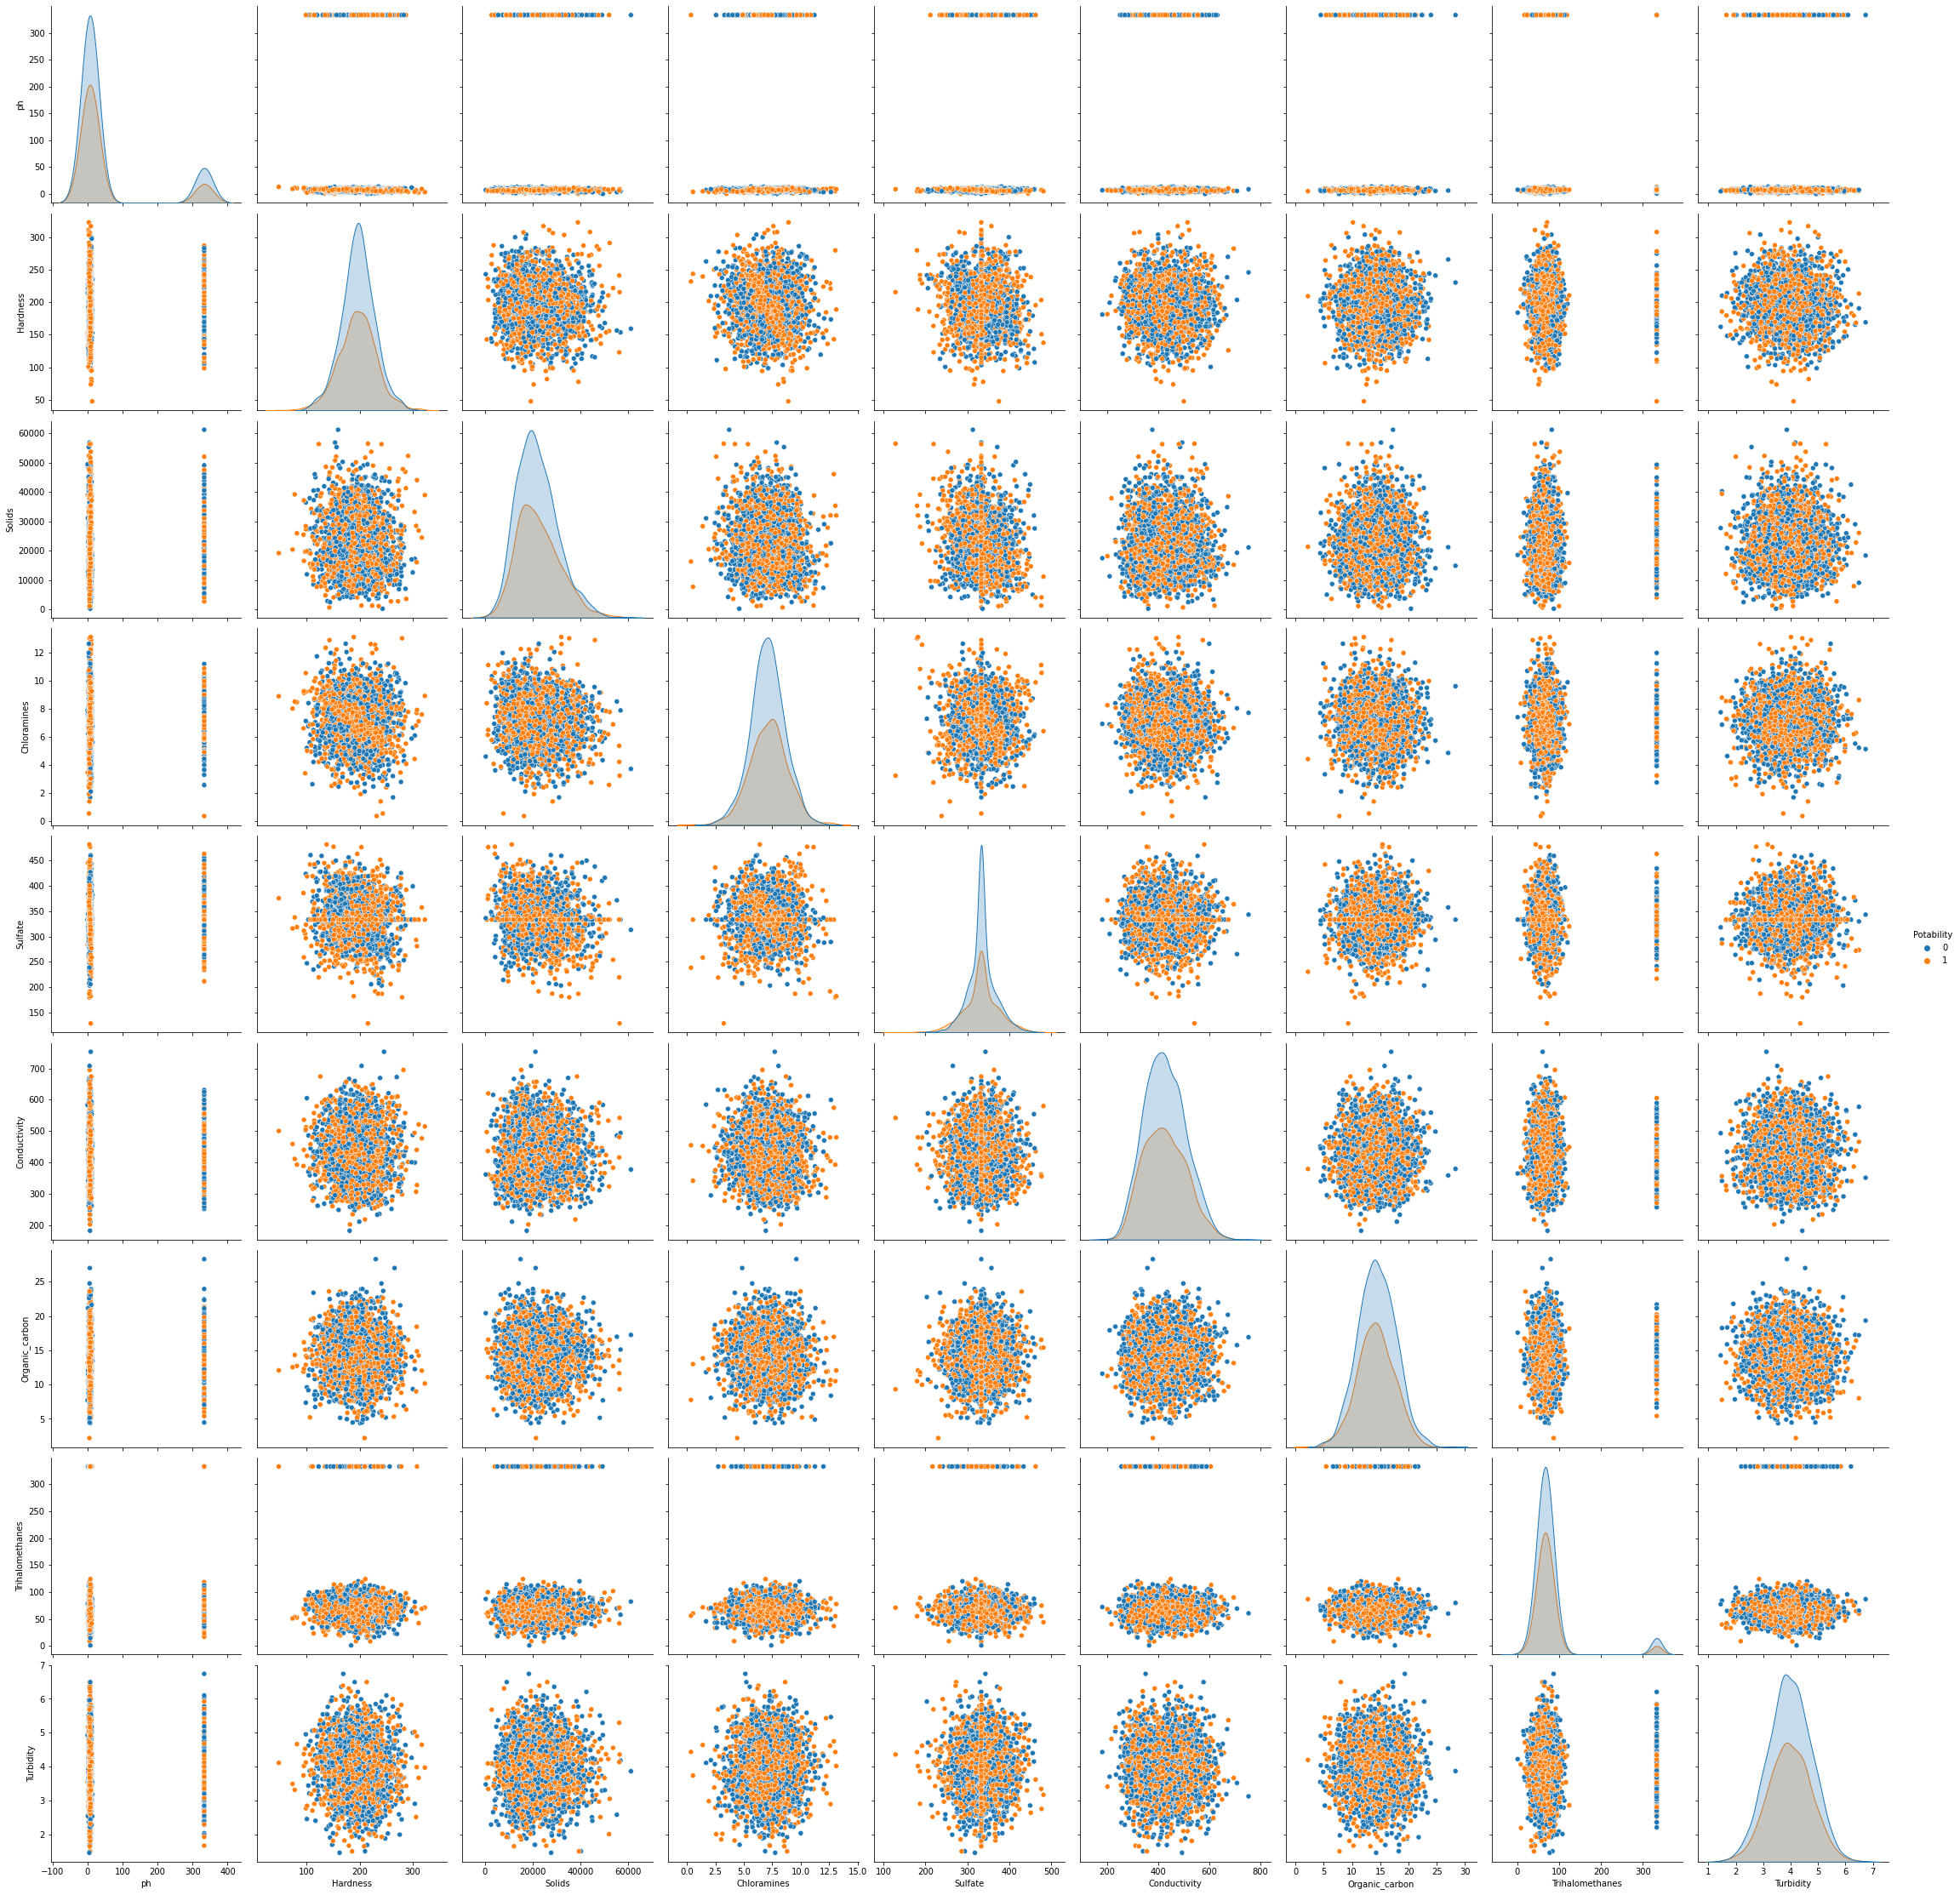

In [80]:
factors = df[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity','Potability']]
sns.pairplot(factors, hue='Potability', height=3.5)

In [112]:
df2 = df.copy()   #copying df
df3 = df.copy()
print("Shape of df2 and df3:")
print(df2.shape, df3.shape)
X = df2[cols]
y = df2['Potability'].copy()
X_3 = df3[cols]
y_3 = df3['Potability'].copy()
print("Shape of features matrix X and X_3:")
print(X.shape, X_3.shape)
print("Shape of target vector y and y_3:")
print(y.shape, y_3.shape)


Shape of df2 and df3:
(3276, 10) (3276, 10)
Shape of features matrix X and X_3:
(3276, 9) (3276, 9)
Shape of target vector y and y_3:
(3276,) (3276,)


In [113]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.14, random_state=0)
model = KNeighborsClassifier(n_neighbors=50)   # instantiating the model
model.fit(x_train,y_train)  #y_train.values.ravel()
preds = model.predict(x_test)  # nump.ndarry
print("Shape of predictions and y_test:",preds.shape, y_test.shape)
acc = np.sum(preds==y_test)/len(y_test)
print(acc)
#ps = preds.shape[0]
#preds = preds.reshape(ps,1)
#print(y_test.head())
#print(preds.shape, y_test.shape)
#print(preds.head())
#x = np.array(preds)
#yy = np.array(y_test)
#print(yy)
#print(x.astype)
#np_y = y_test.to_numpy()
#print(np_y)
#acc = np.sum(preds==np_y)/len(np_y.values)
##print(acc)

Shape of predictions and y_test: (459,) (459,)
0.5969498910675382


In [104]:
x_training, x_testing, y_training, y_testing = train_test_split(X, y, test_size=0.14, random_state=0)
kf = KFold(n_splits=10,shuffle=False)
neighbor_vals = []
temp = []
n_range = [int(5),int(50), int(100), int(300)]
results = []
for n in n_range:
  neighbor_vals.append(n)
  knn_model = KNeighborsClassifier(n_neighbors=n)
  for train, val in kf.split(X=x_training,y=y_training):
    X_fold_train, X_fold_val = x_training.iloc[train], x_training.iloc[val]
    y_fold_train, y_fold_val = y_training.iloc[train], y_training.iloc[val]
    knn_model.fit( X_fold_train, y_fold_train.values.ravel())
    preds = knn_model.predict(X_fold_val)
    #xr = preds.shape[0]
    #print(preds.shape, y_fold_val.shape)
    #preds = preds.reshape(xr,1)
    #print(preds.shape)
    acc = np.sum(preds==y_fold_val)/len(y_fold_val)
    #acc = calc_accuracy(preds, y[validate])
    temp.append(acc)
  x= sum(temp)/len(temp)
  temp.clear()
  results.append(x)
i = np.argmax(results)
nn = neighbor_vals[i]
  #return nn
print("Chose hyper-parameter value:", nn)
model = KNeighborsClassifier(n_neighbors=nn)
model.fit(x_training, y_training)
predic = model.predict(x_testing)
#predic = predic.reshape(predic.shape[0],1)
accur = np.sum(predic==y_testing)/len(y_testing)
print(accur)
tn, fp, fn, tp = confusion_matrix(y_testing, predic).ravel()
print("True negatives:\n", tn, "\nTrue positives:\n", tp, "\nFalse negatives:\n", fn, "\nFalse postives:\n", fp)


Chose hyper-parameter value: 300
0.6230936819172114
True negatives:
 286 
True positives:
 0 
False negatives:
 173 
False postives:
 0


In [85]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
print(y_testing.shape, predic.shape)
#plot_confusion_matrix(y_testing).ravel()
plt.show()




(656,) (656,)
true negatives 412 true positives:  0 false negatives:  244 false postives:  0


In [122]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import recall_score
x_train, x_test, y_train, y_test = train_test_split(X_3, y_3, random_state = 0, test_size = 0.20)
model = MLPClassifier(hidden_layer_sizes=(100,50),activation='relu', solver='sgd',learning_rate_init=0.01,max_iter=1000)
model.fit(x_train,y_train.values.ravel())
preds = model.predict(x_test)
print(preds.shape, y_test.shape)
#preds = preds.reshape(ps,1)
accuracy = np.sum(preds==y_test)/len(y_test)
rec = recall_score(y_test, preds)
print("recall score: ", rec)
negs = np.sum(y_test==0)
pos = np.sum(y_test==1)
print("number of actual zeros:", negs)
print("number of actual ones:", pos)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
print("true negatives", tn, "true positives: ", tp, "false negatives: ", fn, "false postives: ", fp)
print(accuracy)

(656,) (656,)
recall score:  0.004098360655737705
number of actual zeros: 412
number of actual ones: 244
true negatives 412 true positives:  1 false negatives:  243 false postives:  0
0.6295731707317073
